In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:

from calcTI import *

In [126]:
# importing raw data
raw_df = pd.read_csv(r'..\\raw_data_30M\\currency_pairs\\GBPJPY_M30.csv', sep='\t')

In [124]:
raw_df = raw_df[-100000:]

In [127]:
raw_df = raw_df[-100000:]
raw_df.reset_index(inplace=True)
raw_df = raw_df.drop(['index', 'Time'], axis=1)

In [128]:
raw_df = ema_n(raw_df, 200)
raw_df = ema_n(raw_df, 100)

In [129]:
raw_df = vwap(raw_df)

In [130]:
raw_df

,Open,High,Low,Close,Volume,EMA_200,EMA_100,VWAP
0,177.783,177.988,177.743,177.983,3148,177.983,177.983,177.905
1,177.983,178.113,177.802,177.847,3861,177.982,177.980,177.913
2,177.845,177.982,177.732,177.841,3443,177.980,177.978,177.893
3,177.844,178.021,177.799,178.005,2756,177.980,177.978,177.903
4,177.996,178.272,177.947,178.243,2596,177.983,177.983,177.969
...,...,...,...,...,...,...,...,...
99995,158.498,158.626,158.465,158.555,2379,158.762,158.763,158.484
99996,158.553,158.590,158.478,158.484,2185,158.759,158.758,158.517
99997,158.480,158.527,158.412,158.450,2411,158.756,158.752,158.509
99998,158.449,158.462,158.370,158.426,1599,158.753,158.745,158.471


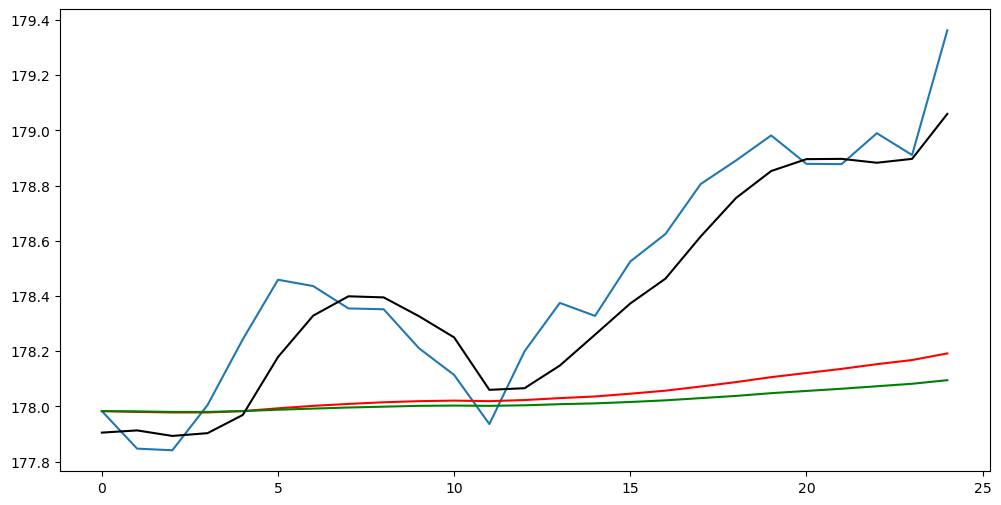

In [138]:
dx = raw_df[:25]
plt.figure(figsize=(12,6))
plt.plot(dx.Close)
plt.plot(dx.EMA_100, 'red')
plt.plot(dx.EMA_200, 'green')
plt.plot(dx.VWAP, 'black')


In [136]:
# Defining what an uptrend or downtrend is
raw_df['Trend'] = [1 if (row['Close'] > row['EMA_200'] + 0.00125 * row['Close']) and (row['Close'] > row['EMA_100'] + 0.001 * row['Close']) and (row['Close'] > row['VWAP'] + 0.0005 * row['Close'])
                        else -1 if row['Close'] < row['EMA_200'] - 0.00125 * row['Close'] and (row['Close'] < row['EMA_100'] + 0.001 * row['Close']) and (row['Close'] < row['VWAP'] + 0.0005 * row['Close'])
                        else 0 
                        for index, row in raw_df.iterrows()]


In [139]:
raw_df

,Open,High,Low,Close,Volume,EMA_200,EMA_100,VWAP,Trend
0,177.783,177.988,177.743,177.983,3148,177.983,177.983,177.905,0
1,177.983,178.113,177.802,177.847,3861,177.982,177.980,177.913,0
2,177.845,177.982,177.732,177.841,3443,177.980,177.978,177.893,0
3,177.844,178.021,177.799,178.005,2756,177.980,177.978,177.903,0
4,177.996,178.272,177.947,178.243,2596,177.983,177.983,177.969,1
...,...,...,...,...,...,...,...,...,...
99995,158.498,158.626,158.465,158.555,2379,158.762,158.763,158.484,-1
99996,158.553,158.590,158.478,158.484,2185,158.759,158.758,158.517,-1
99997,158.480,158.527,158.412,158.450,2411,158.756,158.752,158.509,-1
99998,158.449,158.462,158.370,158.426,1599,158.753,158.745,158.471,-1


In [140]:
raw_df.to_csv('..\\pre_processed_data\\bot_df\\GBPJPY_M30.csv')

In [141]:
final_df = raw_df.drop(['Open', 'High', 'Low', 'Volume'], axis=1)

In [142]:
final_df.to_csv('..\\final_data\\bot_df\\GBPJPY_M30.csv')

In [75]:
final_df = pd.read_csv('..\\final_data\\bot_df\\GBPJPY_M30.csv')

In [76]:
final_df = final_df.drop('Unnamed: 0', axis=1)

In [143]:
final_df

,Close,EMA_200,EMA_100,VWAP,Trend
0,177.983,177.983,177.983,177.905,0
1,177.847,177.982,177.980,177.913,0
2,177.841,177.980,177.978,177.893,0
3,178.005,177.980,177.978,177.903,0
4,178.243,177.983,177.983,177.969,1
...,...,...,...,...,...
99995,158.555,158.762,158.763,158.484,-1
99996,158.484,158.759,158.758,158.517,-1
99997,158.450,158.756,158.752,158.509,-1
99998,158.426,158.753,158.745,158.471,-1


In [144]:
final_df.dtypes

Close      float64
EMA_200    float64
EMA_100    float64
VWAP       float64
Trend        int64
dtype: object

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

In [146]:
x0=[]
x1=[]
x2=[]
x3=[]
y=[]

In [147]:
for i in range (0, final_df.shape[0] - 200):
    x0.append(final_df.iloc[i:i+200, 0])
    x1.append(final_df.iloc[i:i+200, 1])
    x2.append(final_df.iloc[i:i+200, 2])
    x3.append(final_df.iloc[i:i+200, 3])
    y.append(final_df.iloc[i+200, 4])
# maybe also try with 400 or 2000 instead of 200

In [148]:
x0, x1, x2, x3, y = np.array(x0), np.array(x1), np.array(x2), np.array(x3), np.array(y)

In [149]:
y=np.reshape(y, (len(y), 1))

In [150]:
x0 = scaler.fit_transform(x0)
x1 = scaler.fit_transform(x1)
x2 = scaler.fit_transform(x2)
x3 = scaler.fit_transform(x3)

In [151]:
X = np.stack([x0, x1, x2, x3], axis=2)

In [152]:
X.shape

(99800, 200, 4)

In [153]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense
from keras import optimizers

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

NameError: name 'train_test_split' is not defined

In [155]:
X_train.shape

(79840, 200, 4)

In [156]:
X_train

array([[[-1.4433468 , -1.41351912, -1.4017982 , -1.45778335],
        [-1.4446374 , -1.41391135, -1.40270367, -1.45284925],
        [-1.4341842 , -1.4141108 , -1.40335229, -1.44406457],
        ...,
        [-1.39786926, -1.40791635, -1.4037265 , -1.3997929 ],
        [-1.3960131 , -1.40779666, -1.40360756, -1.39787237],
        [-1.40156084, -1.4078059 , -1.40361747, -1.39807643]],

       [[-0.96103385, -0.95738379, -0.95466562, -0.96506596],
        [-0.96058546, -0.9574486 , -0.95479448, -0.96205061],
        [-0.95834012, -0.95751342, -0.95492335, -0.95974111],
        ...,
        [-1.01661341, -0.98679183, -1.00501901, -1.01685862],
        [-1.0213813 , -0.98718079, -1.00534402, -1.01737741],
        [-1.0236385 , -0.98756977, -1.00573347, -1.02008523]],

       [[ 2.32127392,  2.19983358,  2.22342405,  2.30908539],
        [ 2.30796835,  2.20096775,  2.22513595,  2.31053924],
        [ 2.30223467,  2.20203768,  2.22671943,  2.31064553],
        ...,
        [ 2.08146058,  2.20

In [49]:
X_train.shape

(79840, 200, 4)

In [162]:
model = Sequential()

In [163]:
model.add(CuDNNLSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(CuDNNLSTM(64, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [164]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [165]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm_11 (CuDNNLSTM)   (None, 200, 64)           17920     
                                                                 
 cu_dnnlstm_12 (CuDNNLSTM)   (None, 64)                33280     
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 55,425
Trainable params: 55,425
Non-trainable params: 0
_________________________________________________________________


In [166]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

In [167]:
model.fit(X_train, y_train, validation_split=0.2, epochs=40, batch_size=128, callbacks=[es])

Epoch 1/40
499/499 [==============================] - 16s 28ms/step - loss: 0.2445 - mae: 0.3871 - val_loss: 0.2176 - val_mae: 0.3786
Epoch 2/40
499/499 [==============================] - 14s 29ms/step - loss: 0.2011 - mae: 0.3517 - val_loss: 0.1877 - val_mae: 0.3353
Epoch 3/40
499/499 [==============================] - 14s 28ms/step - loss: 0.1884 - mae: 0.3408 - val_loss: 0.1915 - val_mae: 0.3380
Epoch 4/40
499/499 [==============================] - 13s 27ms/step - loss: 0.1750 - mae: 0.3281 - val_loss: 0.1581 - val_mae: 0.3171
Epoch 5/40
499/499 [==============================] - 11s 22ms/step - loss: 0.1596 - mae: 0.3107 - val_loss: 0.1507 - val_mae: 0.2962
Epoch 6/40
499/499 [==============================] - 11s 22ms/step - loss: 0.1542 - mae: 0.3010 - val_loss: 0.1473 - val_mae: 0.3019
Epoch 7/40
499/499 [==============================] - 11s 23ms/step - loss: 0.1533 - mae: 0.2991 - val_loss: 0.1528 - val_mae: 0.3022
Epoch 8/40
499/499 [==============================] - 11s 22ms

In [168]:
model.save('..\\models\\bot\\bot-relu-3-main.hdf5')

In [169]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14518789947032928
Test accuracy: 0.27150723338127136


In [170]:
X_test.shape

(19960, 200, 4)

In [1]:
predictions = model.predict(X_test)

NameError: name 'model' is not defined

In [ ]:
plt.figure(figsize=(30,4))
plt.plot(predictions[200:400], 'g')
plt.plot((y_test[200:400]),  'r')
plt.axhline(y=0, color='black', linestyle='--')
plt.show